In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/kaggle/input/pre-cog/cases/cases_2017.csv
/kaggle/input/pre-cog/cases/cases_2010.csv
/kaggle/input/pre-cog/cases/cases_2014.csv
/kaggle/input/pre-cog/cases/cases_2016.csv
/kaggle/input/pre-cog/cases/cases_2011.csv
/kaggle/input/pre-cog/keys/type_name_key.csv
/kaggle/input/pre-cog/keys/cases_district_key.csv
/kaggle/input/pre-cog/keys/act_key.csv
/kaggle/input/pre-cog/keys/disp_name_key.csv
/kaggle/input/pre-cog/keys/purpose_name_key.csv
/kaggle/input/pre-cog/keys/cases_state_key.csv
/kaggle/input/pre-cog/keys/section_key.csv
/kaggle/input/

In [4]:
case = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2011.csv')
print(case.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201908000022011  2011           1          1         1   
1  01-01-01-201908000032011  2011           1          1         1   
2  01-01-01-201908000042011  2011           1          1         1   
3  01-01-01-201908000052011  2011           1          1         1   
4  01-01-01-201908000062011  2011           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000252011  chief judicial magistrate           0 male   
1  MHNB030003242011  chief judicial magistrate           0 male   
2  MHNB030001492011  chief judicial magistrate           0 male   
3  MHNB030000282011  chief judicial magistrate           0 male   
4  MHNB030000332011  chief judicial magistrate           0 male   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0     -9998 unclear           -9999               0       1683        4762.0   
1          1 fem

In [5]:
acts_sec = pd.read_csv('/kaggle/input/pre-cog/acts_sections/acts_sections.csv')

mer_1 = case.merge(acts_sec, left_on = "ddl_case_id", right_on = "ddl_case_id", how = "left")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
print(mer_1.iloc[900403:900440,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
900403  02-04-03-204202002762011  2011           2          4         3   
900404  02-04-03-204202002782011  2011           2          4         3   
900405  02-04-03-204202002812011  2011           2          4         3   
900406  02-04-03-204202002912011  2011           2          4         3   
900407  02-04-03-204202002982011  2011           2          4         3   
900408  02-04-03-204202003092011  2011           2          4         3   
900409  02-04-03-204202003232011  2011           2          4         3   
900410  02-04-03-204202003292011  2011           2          4         3   
900411  02-04-03-204202003422011  2011           2          4         3   
900412  02-04-03-204202003442011  2011           2          4         3   
900413  02-04-03-204202003462011  2011           2          4         3   
900414  02-04-03-204202003572011  2011           2          4         3   
900415  02-04-03-20420200

In [7]:
mer_1.to_csv('cases_2011_mer.csv', index="false")

In [8]:
state = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')

In [9]:
state_arr = state[state.columns[1:3]].values.tolist()
set(tuple(element) for element in state_arr)
state_x = [list(t) for t in set(tuple(element) for element in state_arr)]

In [10]:
print(state_x)

[[4, 'Kerala'], [12, 'Jammu and Kashmir'], [27, 'Chandigarh'], [6, 'Assam'], [5, 'Himachal Pradesh'], [7, 'Jharkhand'], [16, 'West Bengal'], [24, 'Sikkim'], [15, 'Uttarakhand'], [8, 'Bihar'], [21, 'Meghalaya'], [25, 'Manipur'], [23, 'Madhya Pradesh'], [20, 'Tripura'], [2, 'Andhra Pradesh'], [29, 'Telangana'], [11, 'Orissa'], [19, 'Mizoram'], [33, 'Ladakh'], [9, 'Rajasthan'], [26, 'Delhi'], [14, 'Haryana'], [1, 'Maharashtra'], [13, 'Uttar Pradesh'], [31, 'Diu and Daman'], [18, 'Chhattisgarh'], [32, 'DNH at Silvasa'], [3, 'Karnataka'], [30, 'Goa'], [10, 'Tamil Nadu'], [22, 'Punjab'], [17, 'Gujarat']]


In [11]:
states = pd.DataFrame(state_x, columns = ['state_code', 'state'])

In [12]:
print(states)

    state_code              state
0            4             Kerala
1           12  Jammu and Kashmir
2           27         Chandigarh
3            6              Assam
4            5   Himachal Pradesh
5            7          Jharkhand
6           16        West Bengal
7           24             Sikkim
8           15        Uttarakhand
9            8              Bihar
10          21          Meghalaya
11          25            Manipur
12          23     Madhya Pradesh
13          20            Tripura
14           2     Andhra Pradesh
15          29          Telangana
16          11             Orissa
17          19            Mizoram
18          33             Ladakh
19           9          Rajasthan
20          26              Delhi
21          14            Haryana
22           1        Maharashtra
23          13      Uttar Pradesh
24          31      Diu and Daman
25          18       Chhattisgarh
26          32     DNH at Silvasa
27           3          Karnataka
28          30

In [13]:
mer_2 = mer_1.merge(states, left_on = "state_code", right_on = "state_code", how = "left")

In [14]:
print(mer_2.iloc[899394:900001,:])

                     ddl_case_id  year  state_code  dist_code  court_no  \
899394  02-04-03-201502003562011  2011           2          4         3   
899395  02-04-03-201502003582011  2011           2          4         3   
899396  02-04-03-201502003612011  2011           2          4         3   
899397  02-04-03-201502003632011  2011           2          4         3   
899398  02-04-03-201502003652011  2011           2          4         3   
...                          ...   ...         ...        ...       ...   
899996  02-04-03-202503005242011  2011           2          4         3   
899997  02-04-03-202503005332011  2011           2          4         3   
899998  02-04-03-202503005362011  2011           2          4         3   
899999  02-04-03-202503005392011  2011           2          4         3   
900000  02-04-03-202503005582011  2011           2          4         3   

                    cino                            judge_position  \
899394  APEG050008842011  3-a

In [15]:
state_count = mer_2.groupby('state').count().reset_index()

In [16]:
print(state_count)

                state  ddl_case_id    year  state_code  dist_code  court_no  \
0      Andhra Pradesh       158237  158237      158237     158237    158237   
1               Assam        72233   72233       72233      72233     72233   
2               Bihar       172378  172378      172378     172378    172378   
3          Chandigarh        15006   15006       15006      15006     15006   
4        Chhattisgarh        38090   38090       38090      38090     38090   
5      DNH at Silvasa          670     670         670        670       670   
6               Delhi       104186  104186      104186     104186    104186   
7       Diu and Daman          589     589         589        589       589   
8                 Goa        23888   23888       23888      23888     23888   
9             Gujarat       373473  373473      373473     373473    373473   
10            Haryana       180259  180259      180259     180259    180259   
11   Himachal Pradesh        44381   44381       443

In [17]:
state_count.replace("Orissa", 
           "Odisha", 
           inplace=True)

state_count.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

state_count.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

state_count.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

state_count.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(state_count)

                     state  ddl_case_id    year  state_code  dist_code  \
0           Andhra Pradesh       158237  158237      158237     158237   
1                    Assam        72233   72233       72233      72233   
2                    Bihar       172378  172378      172378     172378   
3               Chandigarh        15006   15006       15006      15006   
4             Chhattisgarh        38090   38090       38090      38090   
5   Dadara & Nagar Havelli          670     670         670        670   
6             NCT of Delhi       104186  104186      104186     104186   
7              Daman & Diu          589     589         589        589   
8                      Goa        23888   23888       23888      23888   
9                  Gujarat       373473  373473      373473     373473   
10                 Haryana       180259  180259      180259     180259   
11        Himachal Pradesh        44381   44381       44381      44381   
12         Jammu & Kashmir        2316

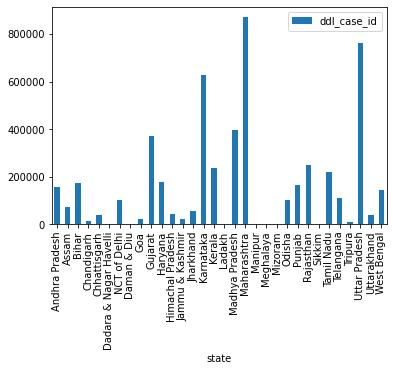

In [18]:
state_count.plot(x="state",y="ddl_case_id", kind="bar")
plt.pyplot.savefig('state_bar_2011.png')

In [19]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(state_count.set_index('state'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [20]:
 state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

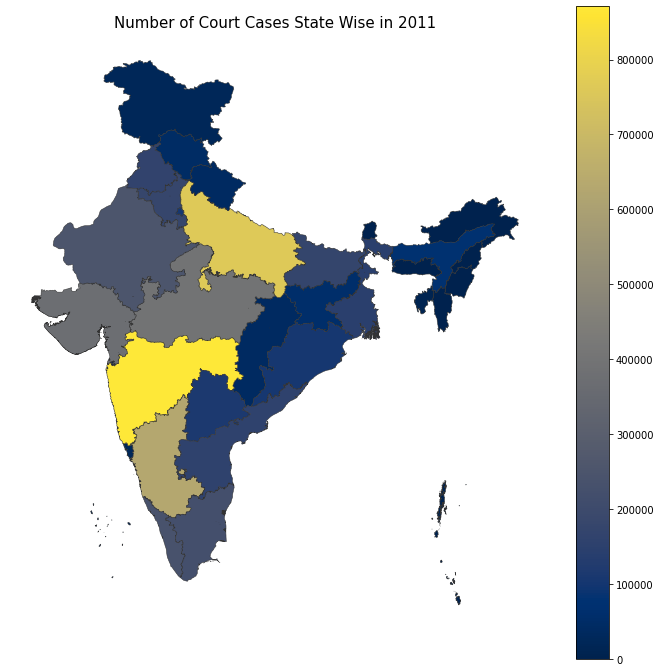

In [21]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Court Cases State Wise in 2011',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='cividis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('state_map_2011.png')

In [22]:
state_2011 = state_map.iloc[:,[1]]
print(state_2011)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                         72233.0
Bihar                        172378.0
Chandigarh                    15006.0
Chhattisgarh                  38090.0
Dadara & Nagar Havelli          670.0
Daman & Diu                     589.0
Goa                           23888.0
Gujarat                      373473.0
Haryana                      180259.0
Himachal Pradesh              44381.0
Jammu & Kashmir               23164.0
Jharkhand                     56304.0
Karnataka                    627571.0
Kerala                       237080.0
Lakshadweep                       0.0
Madhya Pradesh               395004.0
Maharashtra                  870832.0
Manipur                        1176.0
Meghalaya                      1305.0
Mizoram                         665.0
Nagaland                          0.0
NCT of Delhi                 104186.0
Puducherry  

In [23]:
state_2011.to_csv('state_2011.csv')